# Plot  Gaussian distribution  of data

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


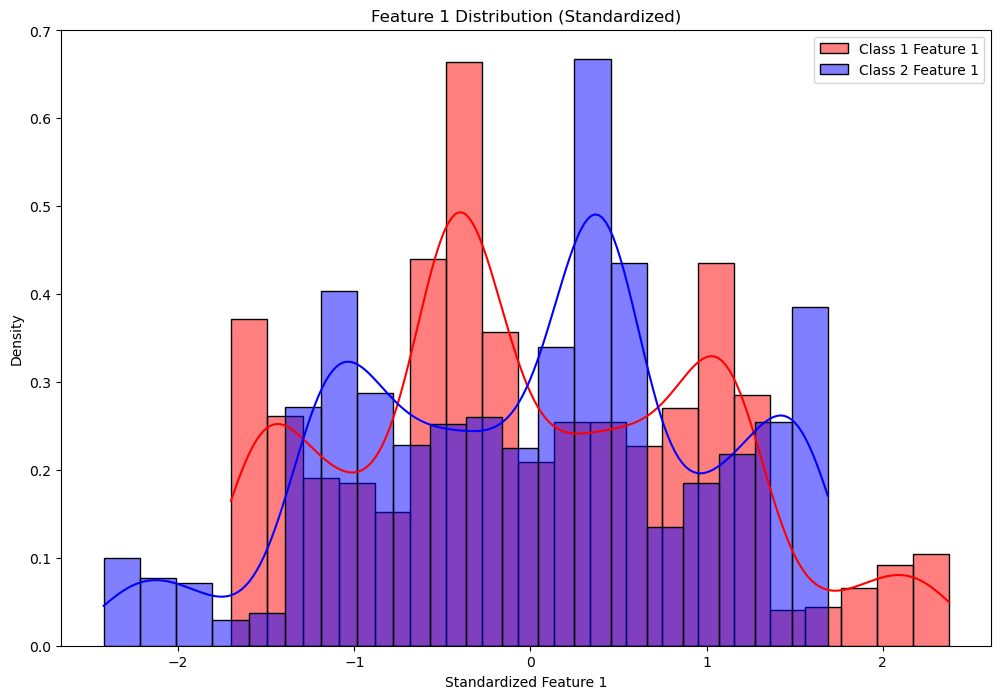

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


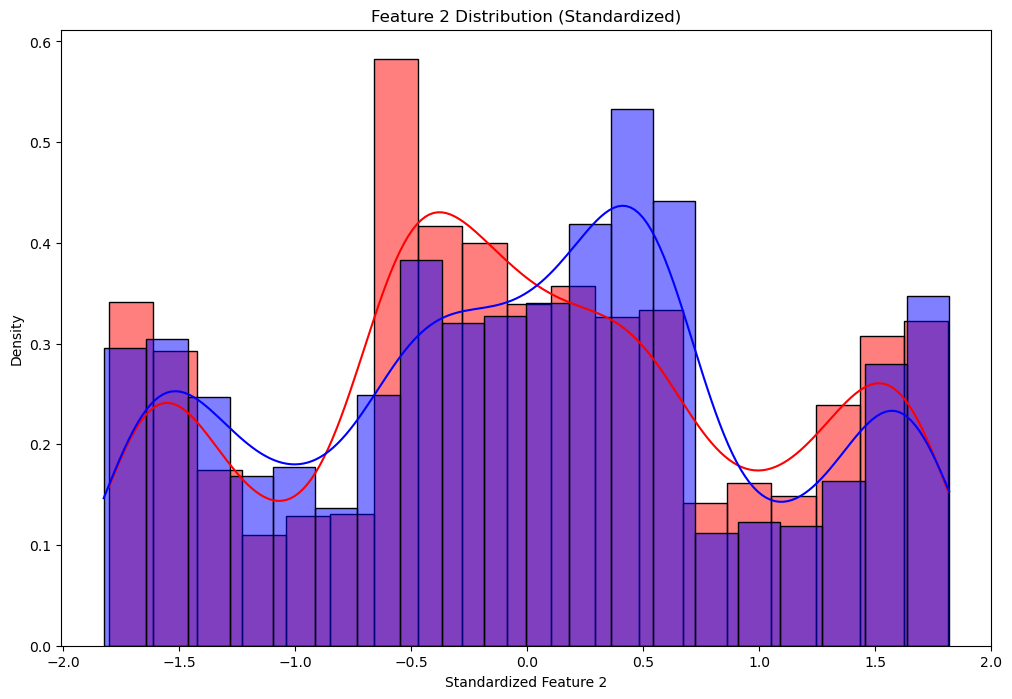

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the data from the files
class1_data = np.loadtxt('C:\\Users\\saura\\Desktop\\assignment spr\\assignment1\\MY_data_set\\Group03\\Group03\\NSL_Group03\\class1.txt')
class2_data = np.loadtxt('C:\\Users\\saura\\Desktop\\assignment spr\\assignment1\\MY_data_set\\Group03\\Group03\\NSL_Group03\\class2.txt')


# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
class1_scaled = scaler.fit_transform(class1_data)
class2_scaled = scaler.fit_transform(class2_data)

# Plotting the distributions of Feature 1 for all classes
plt.figure(figsize=(12, 8))
sns.histplot(class1_scaled[:, 0], color='red', kde=True, label='Class 1 Feature 1', stat='density')
sns.histplot(class2_scaled[:, 0], color='blue', kde=True, label='Class 2 Feature 1', stat='density')

plt.legend()
plt.title('Feature 1 Distribution (Standardized)')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Density')
plt.show()

# Plotting the distributions of Feature 2 for all classes
plt.figure(figsize=(12, 8))
sns.histplot(class1_scaled[:, 1], color='red', kde=True, label='Class 1 Feature 2', stat='density')
sns.histplot(class2_scaled[:, 1], color='blue', kde=True, label='Class 2 Feature 2', stat='density')
plt.title('Feature 2 Distribution (Standardized)')
plt.xlabel('Standardized Feature 2')
plt.ylabel('Density')
plt.show()


# 1. For Diagonal Co-Variance matrix

Classifier Accuracy: 62.81%

Confusion Matrix:
 [[450 248]
 [298 472]]

Precision per class: [0.60160428 0.65555556]
Mean Precision: 0.6285799168152109

Recall per class: [0.64469914 0.61298701]
Mean Recall: 0.6288430766940796

F-Measure per class: [0.62240664 0.63355705]
Mean F-Measure: 0.6279818429920075


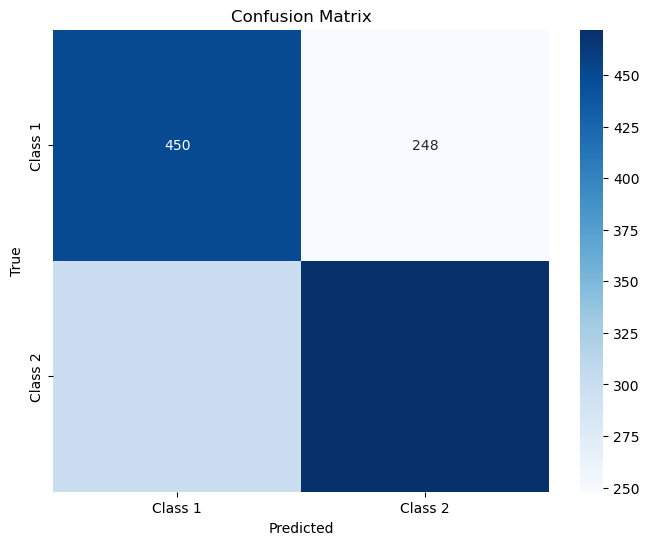

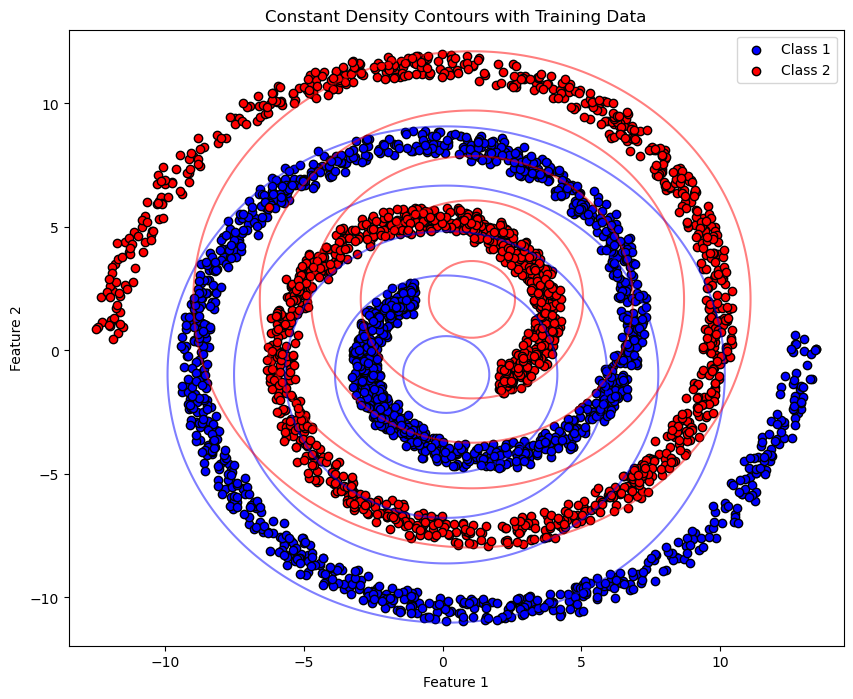

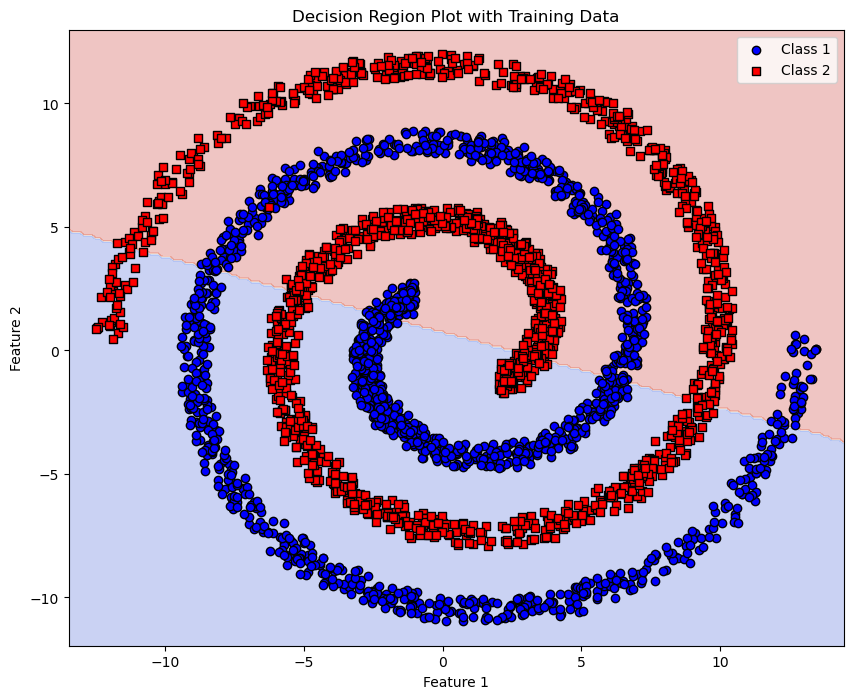

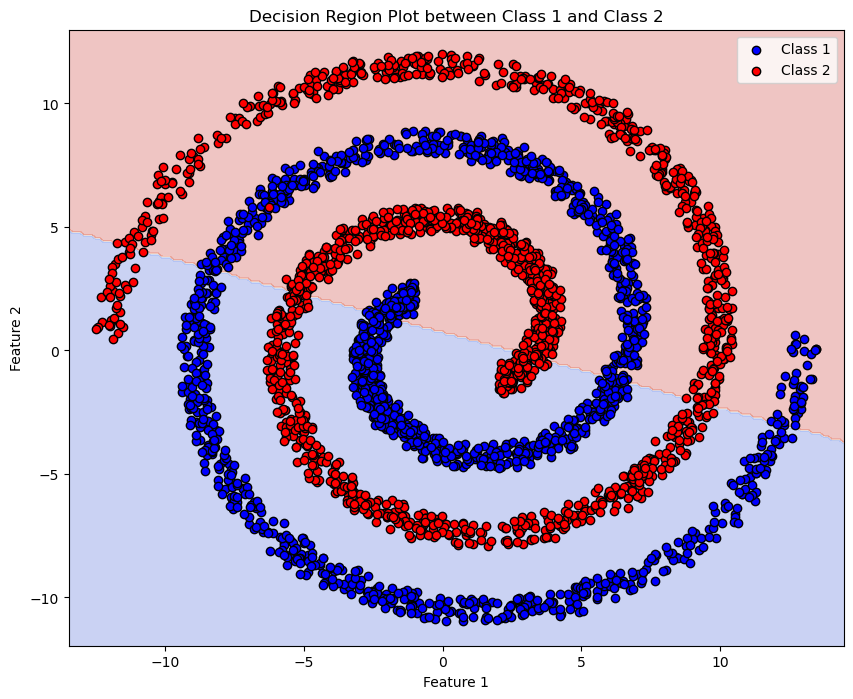

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the data from the files
class1_data = np.loadtxt('C:\\Users\\saura\\Desktop\\assignment spr\\assignment1\\MY_data_set\\Group03\\Group03\\NSL_Group03\\class1.txt')
class2_data = np.loadtxt('C:\\Users\\saura\\Desktop\\assignment spr\\assignment1\\MY_data_set\\Group03\\Group03\\NSL_Group03\\class2.txt')

# Combine the data and create labels
X = np.vstack((class1_data, class2_data))
y = np.array([0]*class1_data.shape[0] + [1]*class2_data.shape[0])

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, labels, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]], labels[indices[:split_idx]], labels[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Compute the mean and covariance matrix for each class
def compute_mean_covariance(X, y):
    classes = np.unique(y)
    means = {}
    covariances = {}
    for c in classes:
        X_c = X[y == c]
        means[c] = np.mean(X_c, axis=0)
        covariances[c] = np.cov(X_c, rowvar=False)
    return means, covariances

means, covariances = compute_mean_covariance(X_train, y_train)

# Calculate the average covariance matrix (for shared covariance assumption)
average_covariance = np.mean(list(covariances.values()), axis=0)
average_variance = np.mean(np.diag(average_covariance))
shared_covariance = average_variance * np.eye(X_train.shape[1])

# Define function to calculate multivariate Gaussian PDF
def multivariate_gaussian_pdf(x, mean, cov):
    size = len(x)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power(2 * np.pi, float(size) / 2) * np.sqrt(det_cov))
    x_mu = np.matrix(x - mean)
    result = np.exp(-0.5 * (x_mu * inv_cov * x_mu.T))
    return norm_const * result

# Define the Bayes classifier manually
def bayes_classifier(X, means, shared_cov, priors):
    y_pred = []
    for x in X:
        posteriors = []
        for c in means.keys():
            prior = np.log(priors[c])
            likelihood = np.log(multivariate_gaussian_pdf(x, means[c], shared_cov))
            posterior = prior + likelihood
            posteriors.append(posterior)
        y_pred.append(np.argmax(posteriors))
    return np.array(y_pred)

# Define the priors (assuming equal priors for simplicity)
priors = {0: 0.5, 1: 0.5}

# Predict using the manual Bayes classifier
y_pred = bayes_classifier(X_test, means, shared_covariance, priors)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# 1) Confusion matrix, classification accuracy, precision, recall, F-measure
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f_measure = f1_score(y_test, y_pred, average=None)

mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f_measure = np.mean(f_measure)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nPrecision per class:", precision)
print("Mean Precision:", mean_precision)
print("\nRecall per class:", recall)
print("Mean Recall:", mean_recall)
print("\nF-Measure per class:", f_measure)
print("Mean F-Measure:", mean_f_measure)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2) Constant density contour plot for all classes with training data superimposed
plt.figure(figsize=(10, 8))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

for mean, color in zip(means.values(), ['blue', 'red']):
    density = np.array([multivariate_gaussian_pdf(point, mean, shared_covariance) for point in grid])
    density = density.reshape(xx.shape)
    plt.contour(xx, yy, density, colors=color, levels=5, alpha=0.5)

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', edgecolors='k', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', edgecolors='k', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Constant Density Contours with Training Data')
plt.legend()
plt.show()

# 3) Decision region plot superimposed by training data
plt.figure(figsize=(10, 8))
Z = bayes_classifier(grid, means, shared_covariance, priors)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='Class 1', edgecolors='k', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', label='Class 2', edgecolors='k', marker='s')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Training Data')
plt.legend()
plt.show()

# Decision region plots for each pair of classes
def plot_decision_boundary(classes, colors, labels):
    plt.figure(figsize=(10, 8))
    selected_means = {c: means[c] for c in classes}
    selected_priors = {c: priors[c] for c in classes}
    Z = bayes_classifier(grid, selected_means, shared_covariance, selected_priors)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    for i, c in enumerate(classes):
        plt.scatter(X_train[y_train == c][:, 0], X_train[y_train == c][:, 1], c=colors[i], edgecolors='k', label=labels[i])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region Plot between {labels[0]} and {labels[1]}')
    plt.legend()
    plt.show()

# Plot decision regions for each pair of classes
plot_decision_boundary([0, 1], ['blue', 'red'], ['Class 1', 'Class 2'])


# 2. For Full Co-Variance matrix

Classifier Accuracy: 62.94%

Confusion Matrix:
 [[446 252]
 [292 478]]

Precision per class: [0.60433604 0.65479452]
Mean Precision: 0.6295652819541894

Recall per class: [0.63896848 0.62077922]
Mean Recall: 0.6298738510772894

F-Measure per class: [0.62116992 0.63733333]
Mean F-Measure: 0.6292516248839368


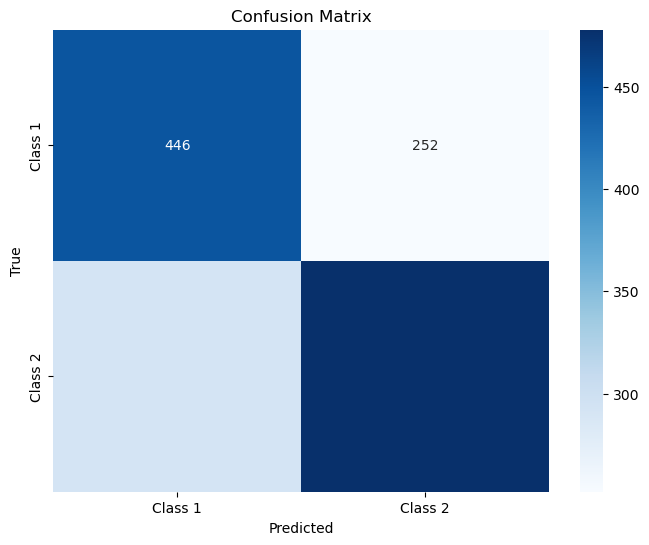

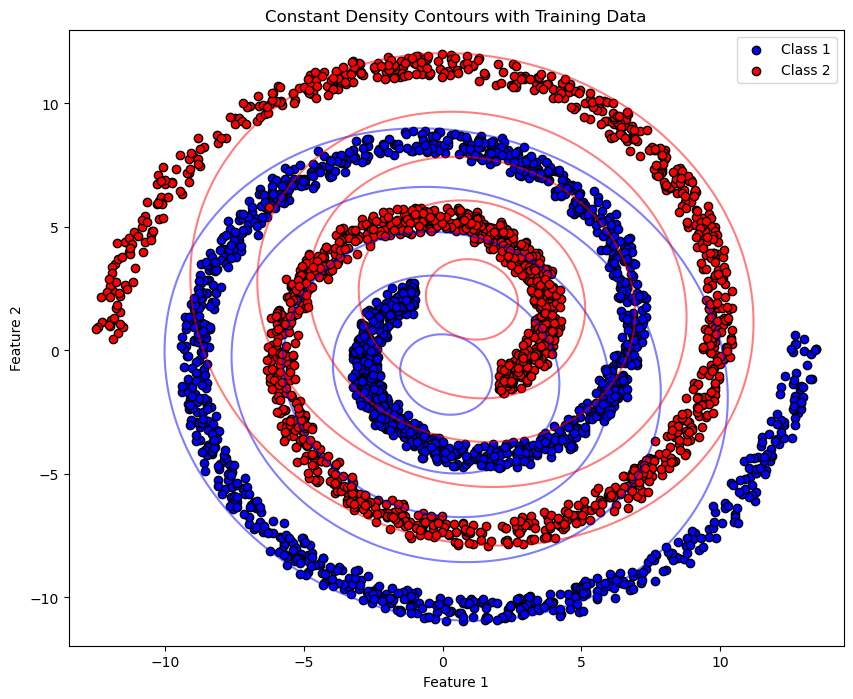

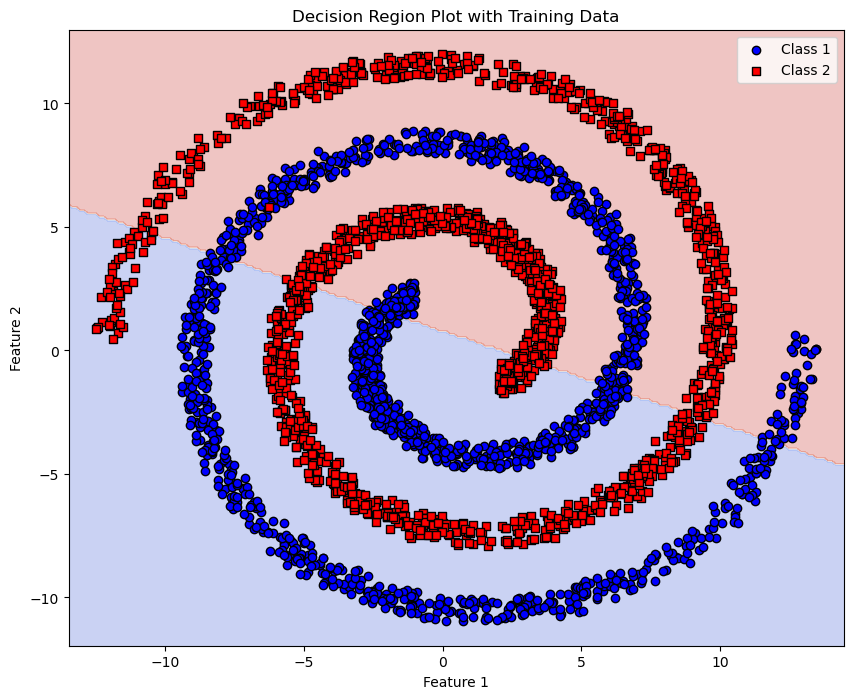

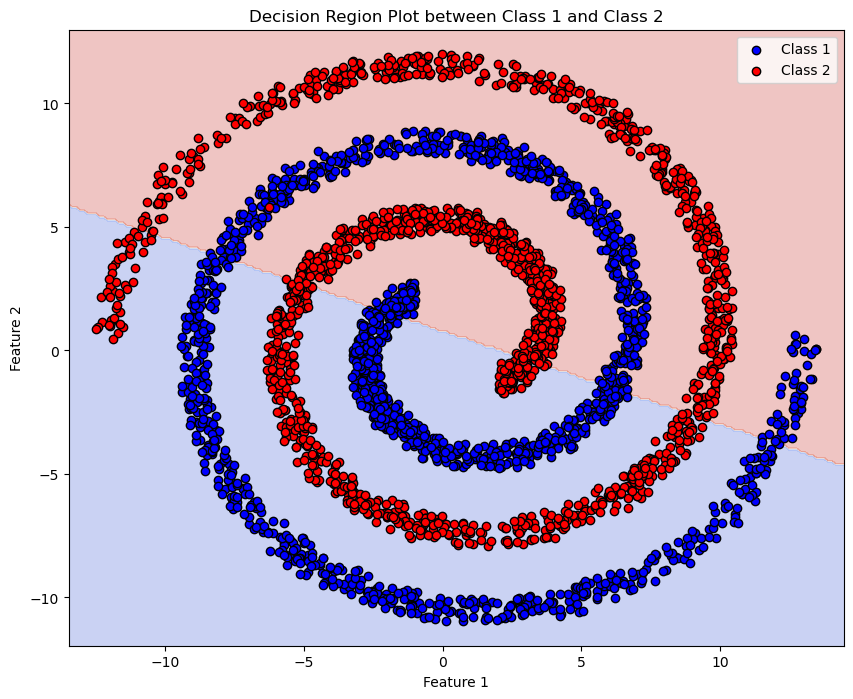

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the data from the files
class1_data = np.loadtxt('C:\\Users\\saura\\Desktop\\assignment spr\\assignment1\\MY_data_set\\Group03\\Group03\\NSL_Group03\\class1.txt')
class2_data = np.loadtxt('C:\\Users\\saura\\Desktop\\assignment spr\\assignment1\\MY_data_set\\Group03\\Group03\\NSL_Group03\\class2.txt')

# Combine the data and create labels
X = np.vstack((class1_data, class2_data))
y = np.array([0]*class1_data.shape[0] + [1]*class2_data.shape[0])

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, labels, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]], labels[indices[:split_idx]], labels[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Compute the mean and covariance matrix for each class
def compute_mean_covariance(X, y):
    classes = np.unique(y)
    means = {}
    covariances = {}
    for c in classes:
        X_c = X[y == c]
        means[c] = np.mean(X_c, axis=0)
        covariances[c] = np.cov(X_c, rowvar=False)
    return means, covariances

means, covariances = compute_mean_covariance(X_train, y_train)

# Calculate the average covariance matrix (for shared covariance assumption)
shared_covariance = np.mean(list(covariances.values()), axis=0)

# Define function to calculate multivariate Gaussian PDF
def multivariate_gaussian_pdf(x, mean, cov):
    size = len(x)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power(2 * np.pi, float(size) / 2) * np.sqrt(det_cov))
    x_mu = np.array(x - mean)
    result = np.exp(-0.5 * np.dot(np.dot(x_mu.T, inv_cov), x_mu))
    return norm_const * result

# Define the Bayes classifier manually
def bayes_classifier(X, means, shared_cov, priors):
    y_pred = []
    for x in X:
        posteriors = []
        for c in means.keys():
            prior = np.log(priors[c])
            likelihood = np.log(multivariate_gaussian_pdf(x, means[c], shared_cov))
            posterior = prior + likelihood
            posteriors.append(posterior)
        y_pred.append(np.argmax(posteriors))
    return np.array(y_pred)

# Define the priors (assuming equal priors for simplicity)
priors = {0: 0.5, 1: 0.5}

# Predict using the manual Bayes classifier
y_pred = bayes_classifier(X_test, means, shared_covariance, priors)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# 1) Confusion matrix, classification accuracy, precision, recall, F-measure
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f_measure = f1_score(y_test, y_pred, average=None)

mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f_measure = np.mean(f_measure)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nPrecision per class:", precision)
print("Mean Precision:", mean_precision)
print("\nRecall per class:", recall)
print("Mean Recall:", mean_recall)
print("\nF-Measure per class:", f_measure)
print("Mean F-Measure:", mean_f_measure)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2) Constant density contour plot for all classes with training data superimposed
plt.figure(figsize=(10, 8))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

for mean, color in zip(means.values(), ['blue', 'red']):
    density = np.array([multivariate_gaussian_pdf(point, mean, shared_covariance) for point in grid])
    density = density.reshape(xx.shape)
    plt.contour(xx, yy, density, colors=color, levels=5, alpha=0.5)

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', edgecolors='k', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', edgecolors='k', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Constant Density Contours with Training Data')
plt.legend()
plt.show()

# 3) Decision region plot superimposed by training data
plt.figure(figsize=(10, 8))
Z = bayes_classifier(grid, means, shared_covariance, priors)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='Class 1', edgecolors='k', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', label='Class 2', edgecolors='k', marker='s')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Training Data')
plt.legend()
plt.show()

# Decision region plots for each pair of classes
def plot_decision_boundary(classes, colors, labels):
    plt.figure(figsize=(10, 8))
    selected_means = {c: means[c] for c in classes}
    selected_priors = {c: priors[c] for c in classes}
    Z = bayes_classifier(grid, selected_means, shared_covariance, selected_priors)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    for i, c in enumerate(classes):
        plt.scatter(X_train[y_train == c][:, 0], X_train[y_train == c][:, 1], c=colors[i], edgecolors='k', label=labels[i])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region Plot between {labels[0]} and {labels[1]}')
    plt.legend()
    plt.show()

# Plot decision regions for each pair of classes
plot_decision_boundary([0, 1], ['blue', 'red'], ['Class 1', 'Class 2'])


# 3. for Diaogonal Co-variance Matrix & having different for each classes : 

Classifier Accuracy: 62.74%

Confusion Matrix:
 [[440 258]
 [289 481]]

Precision per class: [0.60356653 0.65087957]
Mean Precision: 0.627223048237432

Recall per class: [0.63037249 0.62467532]
Mean Recall: 0.6275239087560005

F-Measure per class: [0.61667835 0.63750828]
Mean F-Measure: 0.6270933149061715


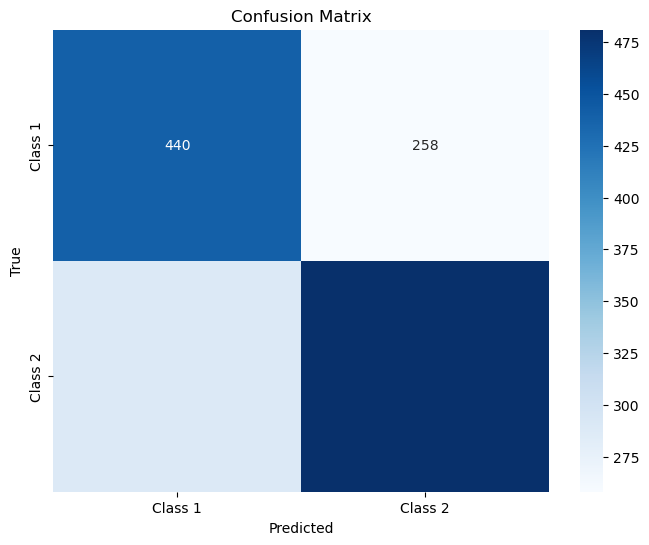

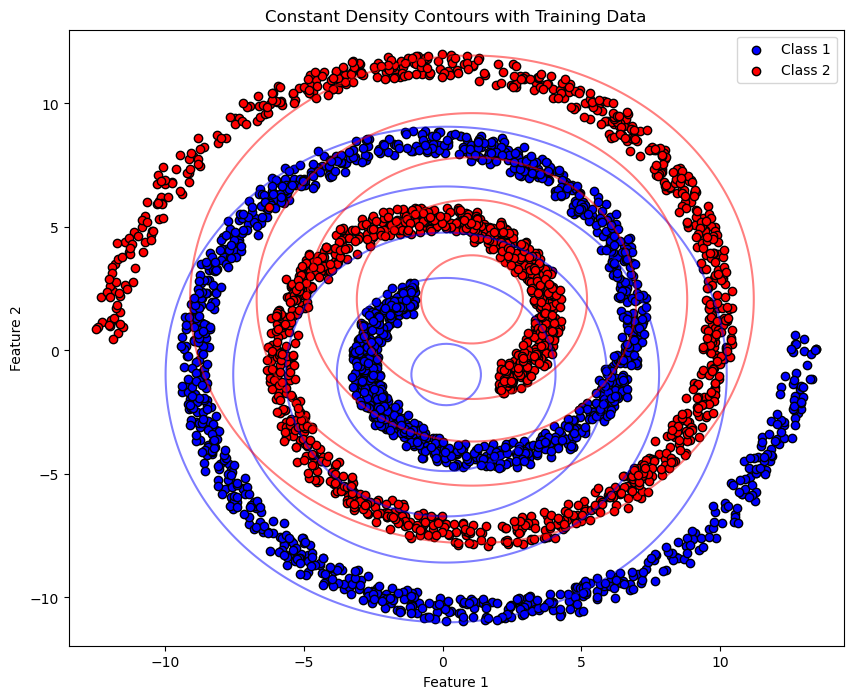

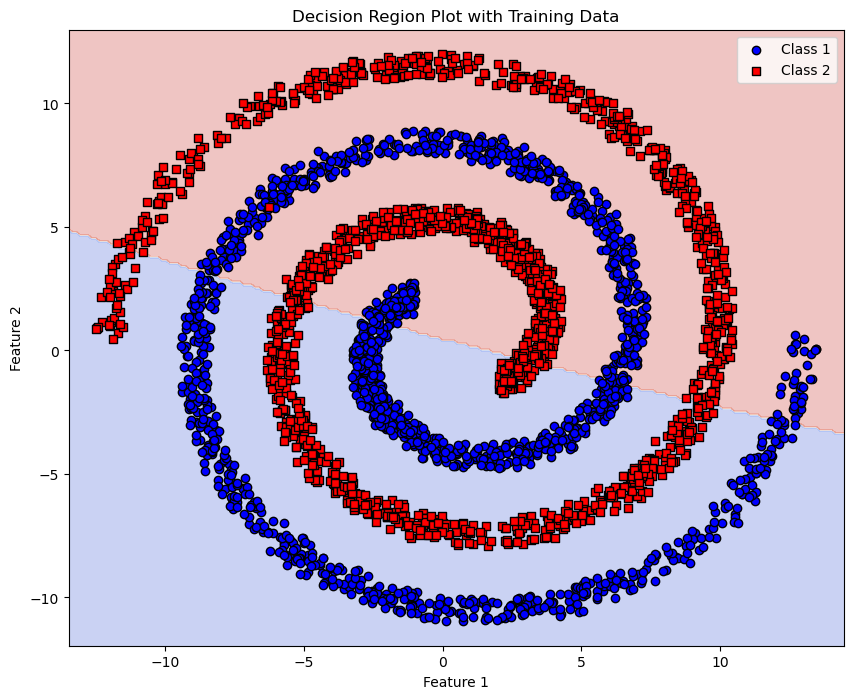

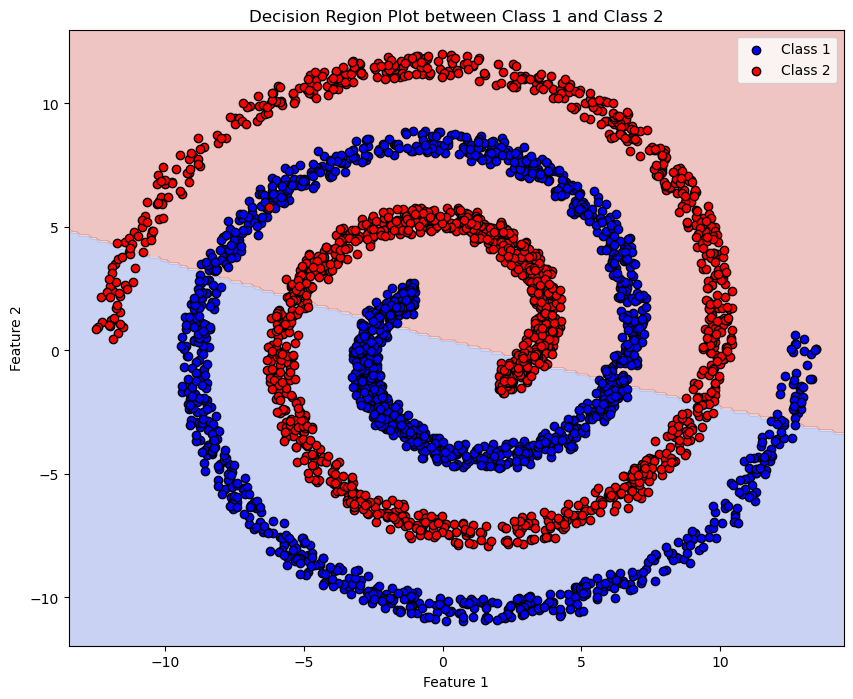

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the data from the files
class1_data = np.loadtxt('C:\\Users\\saura\\Desktop\\assignment spr\\assignment1\\MY_data_set\\Group03\\Group03\\NSL_Group03\\class1.txt')
class2_data = np.loadtxt('C:\\Users\\saura\\Desktop\\assignment spr\\assignment1\\MY_data_set\\Group03\\Group03\\NSL_Group03\\class2.txt')

# Combine the data and create labels
X = np.vstack((class1_data, class2_data))
y = np.array([0]*class1_data.shape[0] + [1]*class2_data.shape[0])

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, labels, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]], labels[indices[:split_idx]], labels[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Compute the mean and diagonal covariance matrix for each class
def compute_mean_covariance(X, y):
    classes = np.unique(y)
    means = {}
    covariances = {}
    for c in classes:
        X_c = X[y == c]
        means[c] = np.mean(X_c, axis=0)
        covariances[c] = np.cov(X_c, rowvar=False)
        # Only keep diagonal elements to create a diagonal covariance matrix
        covariances[c] = np.diag(np.diag(covariances[c]))
    return means, covariances

means, covariances = compute_mean_covariance(X_train, y_train)

# Define function to calculate multivariate Gaussian PDF with diagonal covariance
def multivariate_gaussian_pdf_diagonal(x, mean, diag_cov):
    size = len(x)
    norm_const = 1.0 / np.sqrt((2 * np.pi) ** size * np.prod(diag_cov))
    x_mu = np.array(x - mean)
    result = np.exp(-0.5 * np.sum((x_mu ** 2) / diag_cov))
    return norm_const * result

# Define the Bayes classifier manually
def bayes_classifier(X, means, diag_covariances, priors):
    y_pred = []
    for x in X:
        posteriors = []
        for c in means.keys():
            prior = np.log(priors[c])
            likelihood = np.log(multivariate_gaussian_pdf_diagonal(x, means[c], np.diag(diag_covariances[c])))
            posterior = prior + likelihood
            posteriors.append(posterior)
        y_pred.append(np.argmax(posteriors))
    return np.array(y_pred)

# Define the priors (assuming equal priors for simplicity)
priors = {0: 0.5, 1: 0.5}

# Predict using the manual Bayes classifier
y_pred = bayes_classifier(X_test, means, covariances, priors)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# 1) Confusion matrix, classification accuracy, precision, recall, F-measure
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f_measure = f1_score(y_test, y_pred, average=None)

mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f_measure = np.mean(f_measure)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nPrecision per class:", precision)
print("Mean Precision:", mean_precision)
print("\nRecall per class:", recall)
print("Mean Recall:", mean_recall)
print("\nF-Measure per class:", f_measure)
print("Mean F-Measure:", mean_f_measure)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2) Constant density contour plot for all classes with training data superimposed
plt.figure(figsize=(10, 8))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

for mean, diag_cov, color in zip(means.values(), covariances.values(), ['blue', 'red']):
    density = np.array([multivariate_gaussian_pdf_diagonal(point, mean, np.diag(diag_cov)) for point in grid])
    density = density.reshape(xx.shape)
    plt.contour(xx, yy, density, colors=color, levels=5, alpha=0.5)

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', edgecolors='k', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', edgecolors='k', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Constant Density Contours with Training Data')
plt.legend()
plt.show()

# 3) Decision region plot superimposed by training data
plt.figure(figsize=(10, 8))
Z = bayes_classifier(grid, means, covariances, priors)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='Class 1', edgecolors='k', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', label='Class 2', edgecolors='k', marker='s')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Training Data')
plt.legend()
plt.show()

# Decision region plots for each pair of classes
def plot_decision_boundary(classes, colors, labels):
    plt.figure(figsize=(10, 8))
    selected_means = {c: means[c] for c in classes}
    selected_priors = {c: priors[c] for c in classes}
    Z = bayes_classifier(grid, selected_means, covariances, selected_priors)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    for i, c in enumerate(classes):
        plt.scatter(X_train[y_train == c][:, 0], X_train[y_train == c][:, 1], c=colors[i], edgecolors='k', label=labels[i])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region Plot between {labels[0]} and {labels[1]}')
    plt.legend()
    plt.show()

# Plot decision regions for each pair of classes
plot_decision_boundary([0, 1], ['blue', 'red'], ['Class 1', 'Class 2'])


# 4. for full Co-variance Matrix & having different for each classes :

Classifier Accuracy: 63.22%

Confusion Matrix:
 [[441 257]
 [283 487]]

Precision per class: [0.60911602 0.65456989]
Mean Precision: 0.6318429572862829

Recall per class: [0.63180516 0.63246753]
Mean Recall: 0.6321363450303279

F-Measure per class: [0.62025316 0.64332893]
Mean F-Measure: 0.631791047271876


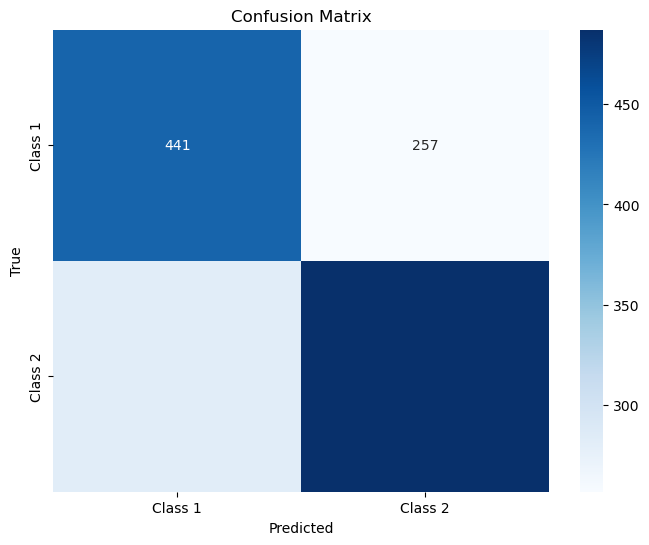

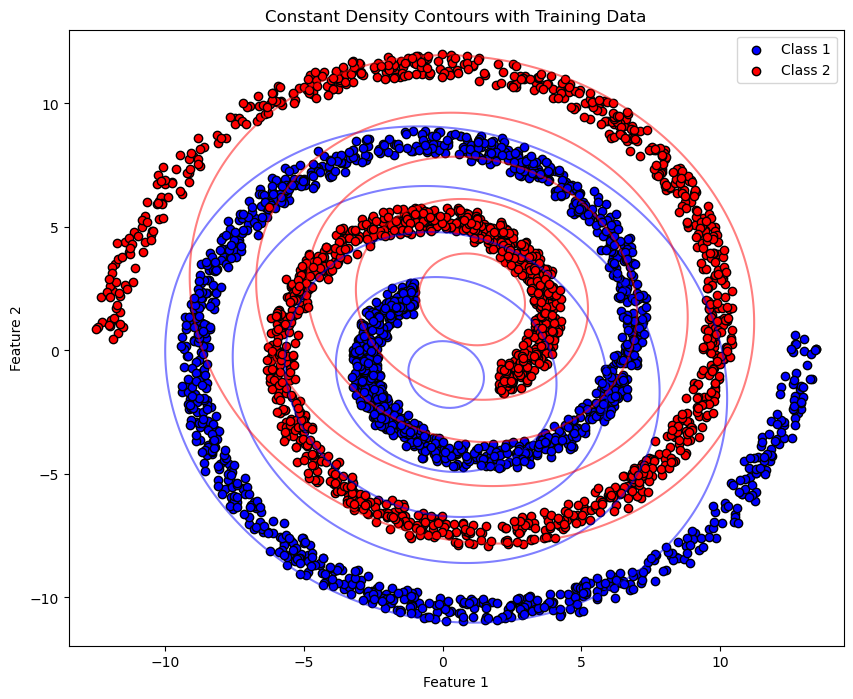

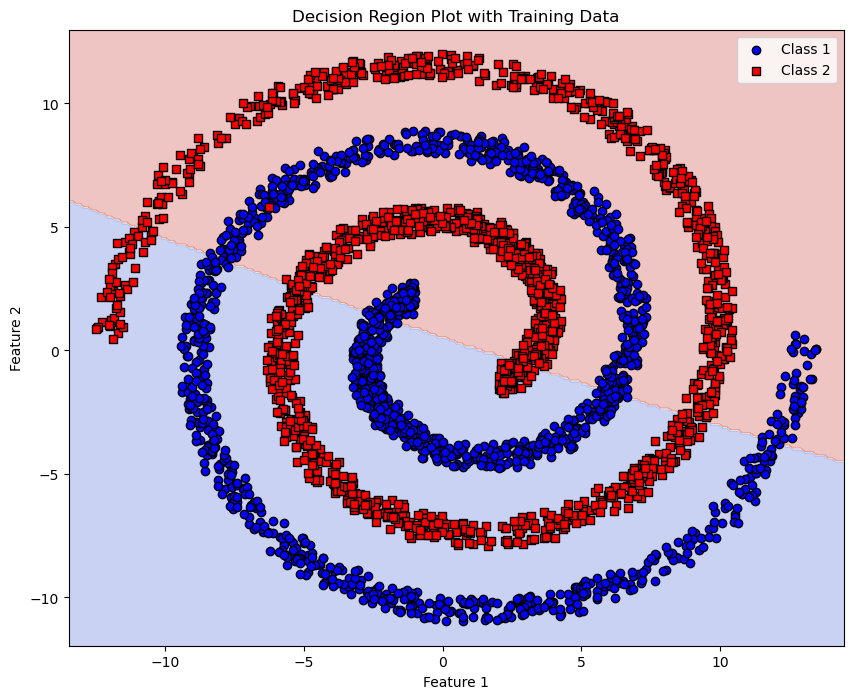

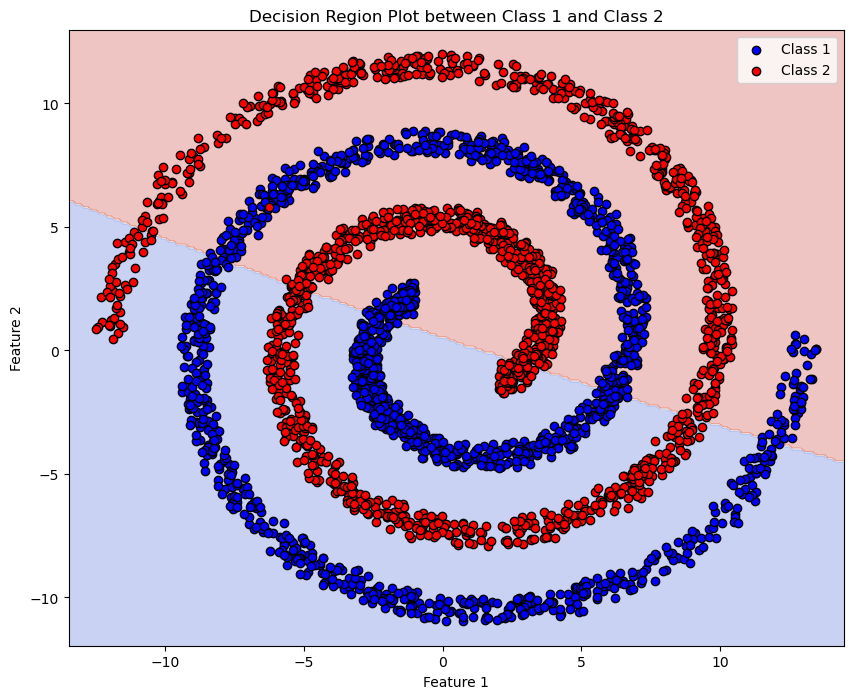

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the data from the files
class1_data = np.loadtxt('C:\\Users\\saura\\Desktop\\assignment spr\\assignment1\\MY_data_set\\Group03\\Group03\\NSL_Group03\\class1.txt')
class2_data = np.loadtxt('C:\\Users\\saura\\Desktop\\assignment spr\\assignment1\\MY_data_set\\Group03\\Group03\\NSL_Group03\\class2.txt')

# Combine the data and create labels
X = np.vstack((class1_data, class2_data))
y = np.array([0]*class1_data.shape[0] + [1]*class2_data.shape[0])

# Split the data into training and test sets (70% train, 30% test)
def train_test_split(data, labels, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    split_idx = int(len(data) * (1 - test_size))
    return data[indices[:split_idx]], data[indices[split_idx:]], labels[indices[:split_idx]], labels[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Compute the mean and full covariance matrix for each class
def compute_mean_covariance(X, y):
    classes = np.unique(y)
    means = {}
    covariances = {}
    for c in classes:
        X_c = X[y == c]
        means[c] = np.mean(X_c, axis=0)
        covariances[c] = np.cov(X_c, rowvar=False)
    return means, covariances

means, covariances = compute_mean_covariance(X_train, y_train)

# Define function to calculate multivariate Gaussian PDF
def multivariate_gaussian_pdf(x, mean, cov):
    size = len(x)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power(2 * np.pi, float(size) / 2) * np.sqrt(det_cov))
    x_mu = np.array(x - mean)
    result = np.exp(-0.5 * np.dot(np.dot(x_mu.T, inv_cov), x_mu))
    return norm_const * result

# Define the Bayes classifier manually
def bayes_classifier(X, means, covariances, priors):
    y_pred = []
    for x in X:
        posteriors = []
        for c in means.keys():
            prior = np.log(priors[c])
            likelihood = np.log(multivariate_gaussian_pdf(x, means[c], covariances[c]))
            posterior = prior + likelihood
            posteriors.append(posterior)
        y_pred.append(np.argmax(posteriors))
    return np.array(y_pred)

# Define the priors (assuming equal priors for simplicity)
priors = {0: 0.5, 1: 0.5}

# Predict using the manual Bayes classifier
y_pred = bayes_classifier(X_test, means, covariances, priors)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Classifier Accuracy: {accuracy * 100:.2f}%")

# 1) Confusion matrix, classification accuracy, precision, recall, F-measure
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f_measure = f1_score(y_test, y_pred, average=None)

mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f_measure = np.mean(f_measure)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nPrecision per class:", precision)
print("Mean Precision:", mean_precision)
print("\nRecall per class:", recall)
print("Mean Recall:", mean_recall)
print("\nF-Measure per class:", f_measure)
print("Mean F-Measure:", mean_f_measure)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2) Constant density contour plot for all classes with training data superimposed
plt.figure(figsize=(10, 8))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

for mean, cov, color in zip(means.values(), covariances.values(), ['blue', 'red']):
    density = np.array([multivariate_gaussian_pdf(point, mean, cov) for point in grid])
    density = density.reshape(xx.shape)
    plt.contour(xx, yy, density, colors=color, levels=5, alpha=0.5)

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', edgecolors='k', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', edgecolors='k', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Constant Density Contours with Training Data')
plt.legend()
plt.show()

# 3) Decision region plot superimposed by training data
plt.figure(figsize=(10, 8))
Z = bayes_classifier(grid, means, covariances, priors)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='Class 1', edgecolors='k', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', label='Class 2', edgecolors='k', marker='s')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Training Data')
plt.legend()
plt.show()

# Decision region plots for each pair of classes
def plot_decision_boundary(classes, colors, labels):
    plt.figure(figsize=(10, 8))
    selected_means = {c: means[c] for c in classes}
    selected_priors = {c: priors[c] for c in classes}
    Z = bayes_classifier(grid, selected_means, covariances, selected_priors)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    for i, c in enumerate(classes):
        plt.scatter(X_train[y_train == c][:, 0], X_train[y_train == c][:, 1], c=colors[i], edgecolors='k', label=labels[i])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region Plot between {labels[0]} and {labels[1]}')
    plt.legend()
    plt.show()

# Plot decision regions for each pair of classes
plot_decision_boundary([0, 1], ['blue', 'red'], ['Class 1', 'Class 2'])
